In [89]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [107]:
# Load crime data set into pandas
crime_data = pd.read_csv("Final Data File v2.csv")
crime_data['No. of Officers'] = round(crime_data['No. of Officers'],1)
crime_data["Population"] = crime_data["Population"].str.replace(',', '').astype(float)
crime_data["Avg. Income"] = crime_data["Avg. Income"].str.replace(',', '')
crime_data["Avg. Income"] = crime_data["Avg. Income"].str.replace('$', '').astype(float)
crime_data.head()

,State,State Ab.,State Capital,Population,ORI Code,No. of Officers,Year of Data,No. of Rapes,No. of Simple Assaults,No. of Stolen Property Cases,...,School Ratings,Unnamed: 12,Unemployment Rate,Unnamed: 14,Avg. Income,Unnamed: 16,"Crimes(R,SA,SP) Per Citizen",School Correlation?,Unemploy. Correlation?,Income Correlation?
0,ALABAMA,AL,Montgomery,198525.0,AL0030100,474.0,2018.0,3.0,102.0,13.0,...,4.35,NaN,3.04,NaN,48486.0,NaN,0.000594,n,NaN,NaN
1,ALASKA,AK,Juneau,32113.0,AK0010300,47.0,2018.0,5.0,291.0,4.0,...,6.50,NaN,3.80,NaN,76715.0,NaN,0.009342,n,NaN,NaN
2,ARIZONA,AZ,Phoenix,1680992.0,AZ0072300,2919.0,2018.0,103.0,5726.0,364.0,...,4.72,NaN,3.03,NaN,56213.0,NaN,0.003684,m,NaN,NaN
3,ARKANSAS,AR,Little Rock,197312.0,AR0600200,575.0,2018.0,28.0,947.0,291.0,...,3.64,NaN,2.53,NaN,45726.0,NaN,0.006416,y,NaN,NaN
4,CALIFORNIA,CA,Sacramento,513624.0,CA0340400,651.0,2018.0,30.0,1309.0,281.0,...,4.63,NaN,3.38,NaN,71228.0,NaN,0.003154,y,NaN,NaN


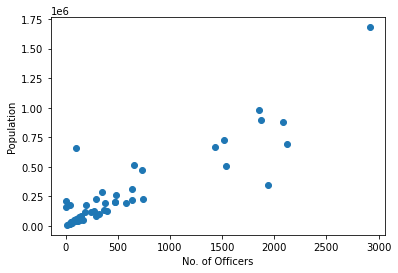

In [116]:
# Generate a scatter plot of population versus no. of officers
pop = crime_data.iloc[0:49,3]
officer_num = crime_data.iloc[0:49,5]
plt.scatter(officer_num, pop)

plt.ylabel('Population')
plt.xlabel('No. of Officers')
plt.show()

In [92]:
# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = stats.linregress(officer_num, pop)

In [93]:
# Create equation of line to calculate predicted violent crime rate
fit = slope * officer_num + int

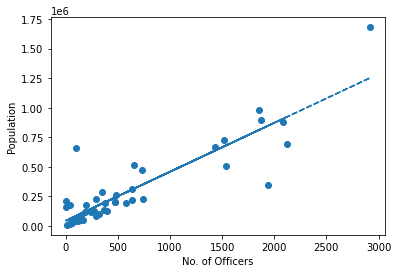

In [111]:
pop = crime_data.iloc[0:49,3]
officer_num = crime_data.iloc[0:49,5]
plt.scatter(officer_num, pop)
plt.plot(officer_num,fit,"--")

plt.ylabel('Population')
plt.xlabel('No. of Officers')
plt.show()

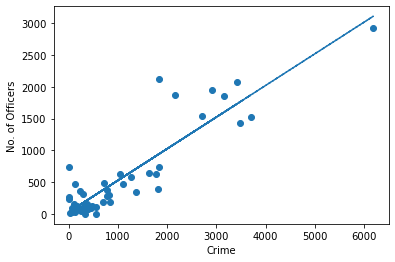

In [110]:
# Repeat plotting scatter and linear model for crime vs officer count
crime = crime_data.iloc[0:49,10]
officer_num = crime_data.iloc[0:49,5]

co_slope, co_int, co_r, co_p, co_std_err = stats.linregress(crime, officer_num)
co_fit = co_slope * crime + co_int

plt.scatter(crime, officer_num)
plt.plot(crime,co_fit,"--")

plt.xlabel('Crime')
plt.ylabel('No. of Officers')
plt.show()

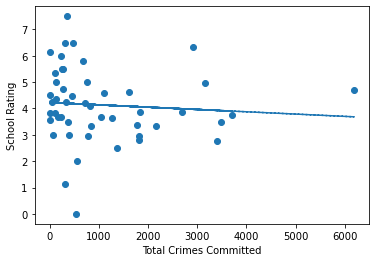

In [109]:
# Repeat plotting scatter and linear model for year versus aggravated assault
crime_num = crime_data.iloc[0:49,10]
school_rating = crime_data.iloc[0:49,11]

cs_slope, cs_int, cs_r, cs_p, cs_std_err = stats.linregress(crime_num, school_rating)
cs_fit = cs_slope * crime_num + cs_int

plt.scatter(crime_num, school_rating)
plt.plot(crime_num,cs_fit,"--")

plt.xlabel('Total Crimes Committed')
plt.ylabel('School Rating')
plt.show()

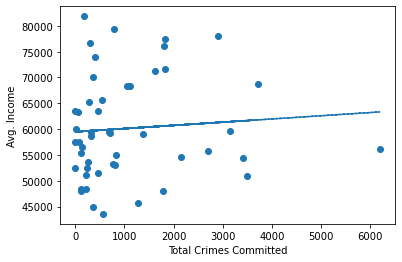

In [113]:
crime_num = crime_data.iloc[0:49,10]
income = crime_data.iloc[0:49,15]

ci_slope, ci_int, ci_r, ci_p, ci_std_err = stats.linregress(crime_num, income)
ci_fit = ci_slope * crime_num + ci_int

plt.scatter(crime_num, income)
plt.plot(crime_num,ci_fit,"--")

plt.xlabel('Total Crimes Committed')
plt.ylabel('Avg. Income')
plt.show()

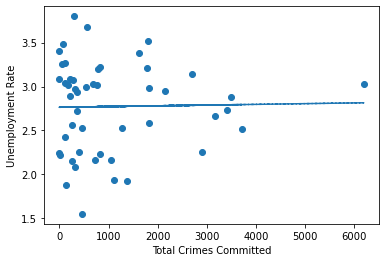

In [121]:
crime_num = crime_data.iloc[0:49,10]
unemploy_rate = crime_data.iloc[0:49,13]

cu_slope, cu_int, cu_r, cu_p, cu_std_err = stats.linregress(crime_num, unemploy_rate)
cu_fit = cu_slope * crime_num + cu_int

plt.scatter(crime_num, unemploy_rate)
plt.plot(crime_num,cu_fit,"--")

plt.xlabel('Total Crimes Committed')
plt.ylabel ('Unemployment Rate')
plt.show()

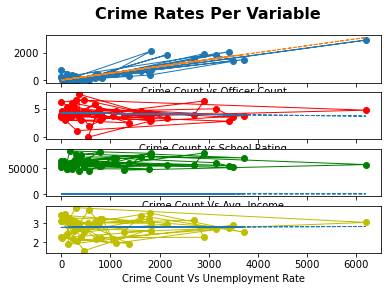

In [128]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle("Crime Rates Per Variable", fontsize=16, fontweight="bold")

ax1.plot(crime, officer_num, linewidth=1, marker="o")
ax1.plot(crime, co_fit, "--", linewidth=1)
ax1.set_xlabel("Crime Count vs Officer Count")

ax2.plot(crime_num, school_rating, linewidth=1, marker="o", color="r")
ax2.plot(crime_num, cs_fit, "--", linewidth=1)
ax2.set_xlabel("Crime Count vs School Rating")

ax3.plot(crime_num, income, linewidth=1, marker="o", color="g")
ax3.plot(crime_num, ci_fit, "--", linewidth=1)
ax3.set_xlabel("Crime Count Vs Avg. Income")

ax4.plot(crime_num, unemploy_rate, linewidth=1, marker="o", color="y")
ax4.plot(crime_num, cu_fit, "--", linewidth=1)
ax4.set_xlabel("Crime Count Vs Unemployment Rate")

plt.show()